In [109]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [110]:
housing = pd.DataFrame(pd.read_csv("Housing.csv"))

In [111]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [112]:
housing.shape

(545, 13)

In [113]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [114]:
# Checking Null values
housing.isnull().sum()*100/housing.shape[0]
# if There are no NULL values in the dataset, hence it is clean.

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64

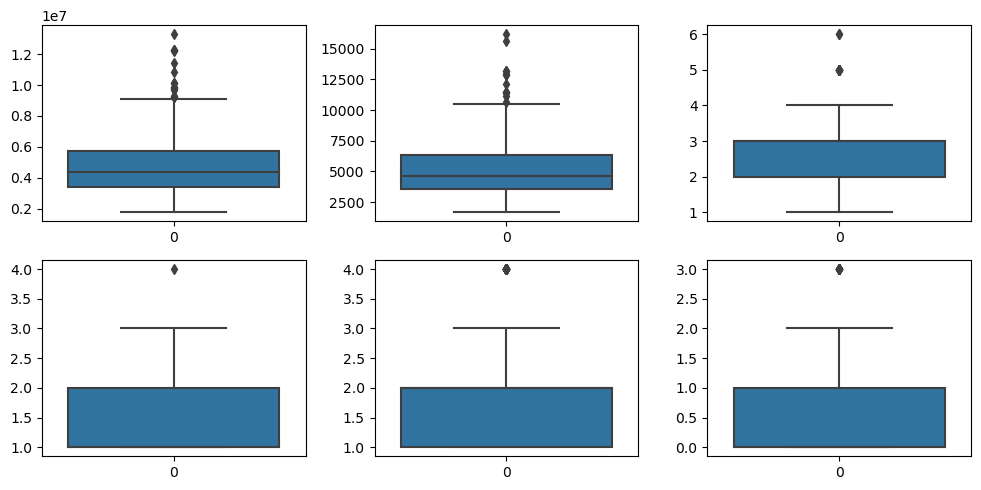

In [115]:
fig, axs = plt.subplots(2,3, figsize = (10,5))
plt1 = sns.boxplot(housing['price'], ax = axs[0,0])
plt2 = sns.boxplot(housing['area'], ax = axs[0,1])
plt3 = sns.boxplot(housing['bedrooms'], ax = axs[0,2])
plt1 = sns.boxplot(housing['bathrooms'], ax = axs[1,0])
plt2 = sns.boxplot(housing['stories'], ax = axs[1,1])
plt3 = sns.boxplot(housing['parking'], ax = axs[1,2])

plt.tight_layout()

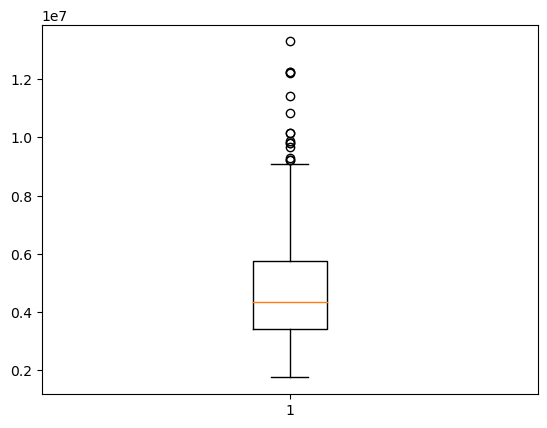

In [116]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

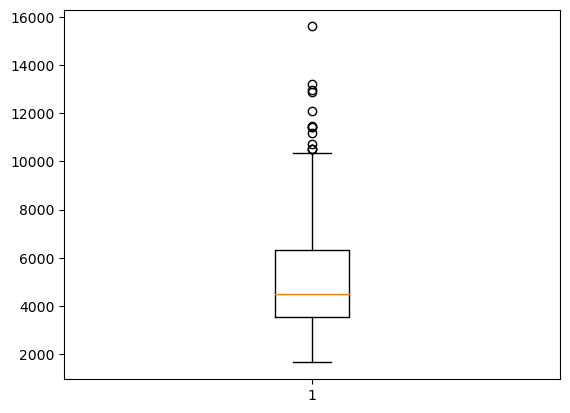

In [117]:
plt.boxplot(housing.area)
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

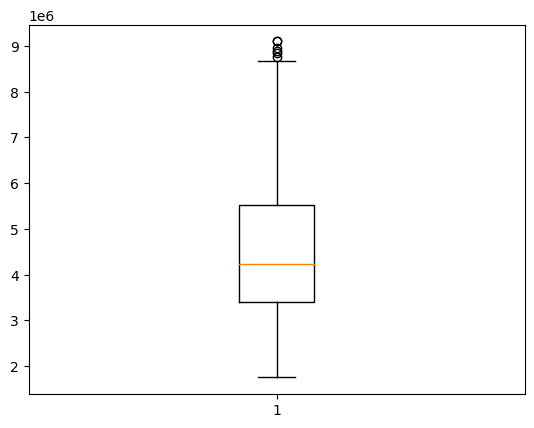

In [118]:
# outlier treatment for price
plt.boxplot(housing.price)
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

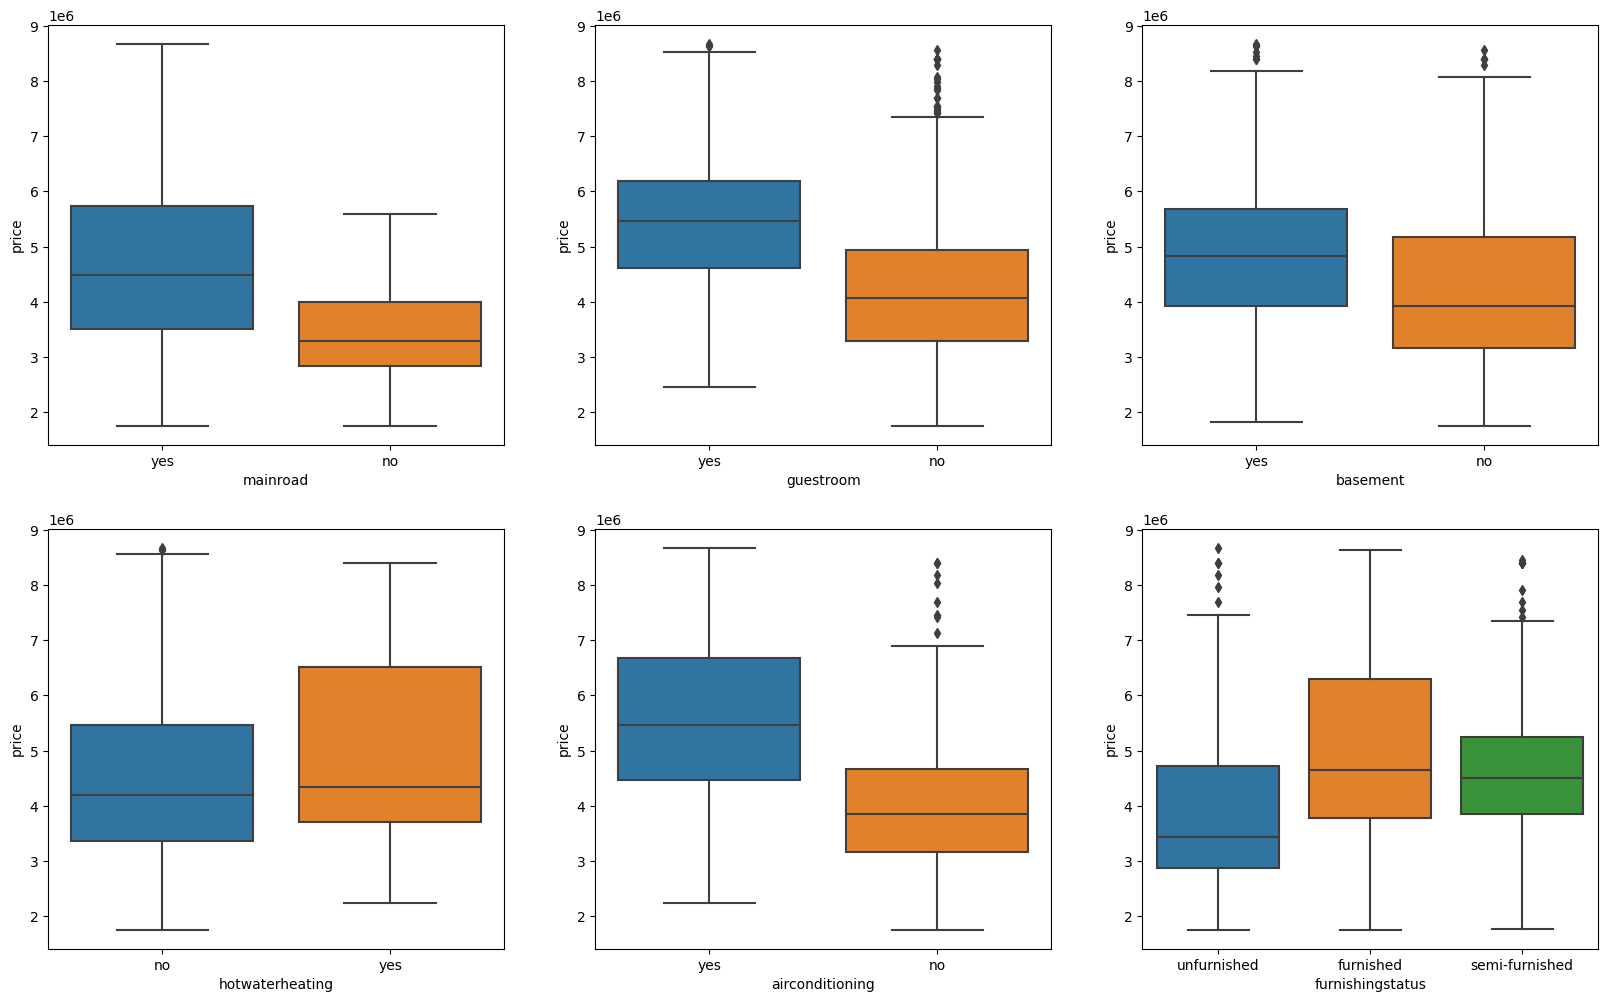

In [119]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'mainroad', y = 'price', data = housing)
plt.subplot(2,3,2)
sns.boxplot(x = 'guestroom', y = 'price', data = housing)
plt.subplot(2,3,3)
sns.boxplot(x = 'basement', y = 'price', data = housing)
plt.subplot(2,3,4)
sns.boxplot(x = 'hotwaterheating', y = 'price', data = housing)
plt.subplot(2,3,5)
sns.boxplot(x = 'airconditioning', y = 'price', data = housing)
plt.subplot(2,3,6)
sns.boxplot(x = 'furnishingstatus', y = 'price', data = housing)
plt.show()

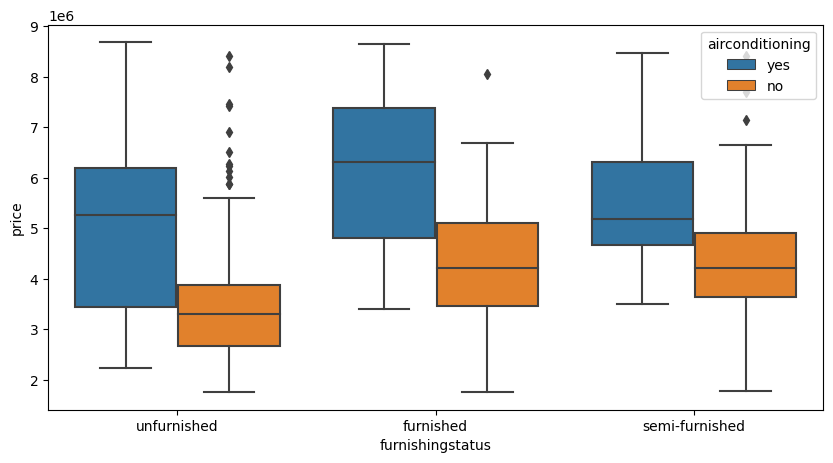

In [120]:
plt.figure(figsize = (10, 5))
sns.boxplot(x = 'furnishingstatus', y = 'price', hue = 'airconditioning', data = housing)
plt.show()
#plotting and showing the box plot

In [121]:
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# Defining the map function
def binary_map(x):
    return x.map({'yes': 1, "no": 0})

# Applying the function to the housing list
housing[varlist] = housing[varlist].apply(binary_map)

In [122]:
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished


In [123]:
status = pd.get_dummies(housing['furnishingstatus'])
status.head()

,furnished,semi-furnished,unfurnished
21,False,False,True
22,True,False,False
23,True,False,False
24,True,False,False
25,True,False,False


In [124]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True) ##dropping the column

In [125]:
status = pd.get_dummies(housing['furnishingstatus'], drop_first = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
21,8680000,7155,3,2,1,1,1,1,0,1,2,0,unfurnished
22,8645000,8050,3,1,1,1,1,1,0,1,1,0,furnished
23,8645000,4560,3,2,2,1,1,1,0,1,1,0,furnished
24,8575000,8800,3,2,2,1,0,0,0,1,2,0,furnished
25,8540000,6540,4,2,2,1,1,1,0,1,2,1,furnished


In [126]:
# Drop 'furnishingstatus' as we have created the dummies for it

housing.drop(['furnishingstatus'], axis = 1, inplace = True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
21,8680000,7155,3,2,1,1,1,1,0,1,2,0
22,8645000,8050,3,1,1,1,1,1,0,1,1,0
23,8645000,4560,3,2,2,1,1,1,0,1,1,0
24,8575000,8800,3,2,2,1,0,0,0,1,2,0
25,8540000,6540,4,2,2,1,1,1,0,1,2,1


In [127]:
from sklearn.model_selection import train_test_split

# training and testing data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [128]:
from sklearn.preprocessing import MinMaxScaler

In [129]:
scaler = MinMaxScaler()

In [130]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
101,6230000,5500,3,1,3,1,0,0,0,0,1,1
487,2870000,5400,4,1,2,1,0,0,0,0,0,0
249,4543000,4990,4,2,2,1,1,1,0,0,0,1
110,6090000,6600,3,1,1,1,1,1,0,0,2,1
499,2660000,3630,3,3,2,0,1,0,0,0,0,0


In [131]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea
count,3.570000e+02,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,4.483361e+06,4925.728291,2.935574,1.246499,1.792717,0.848739,0.184874,0.366947,0.042017,0.308123,0.649860,0.204482
std,1.503671e+06,1789.437703,0.741086,0.462978,0.875158,0.358805,0.388740,0.482648,0.200909,0.462366,0.840065,0.403889
min,1.750000e+06,1650.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.360000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+06,4500.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.460000e+06,6050.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,8.680000e+06,10360.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000


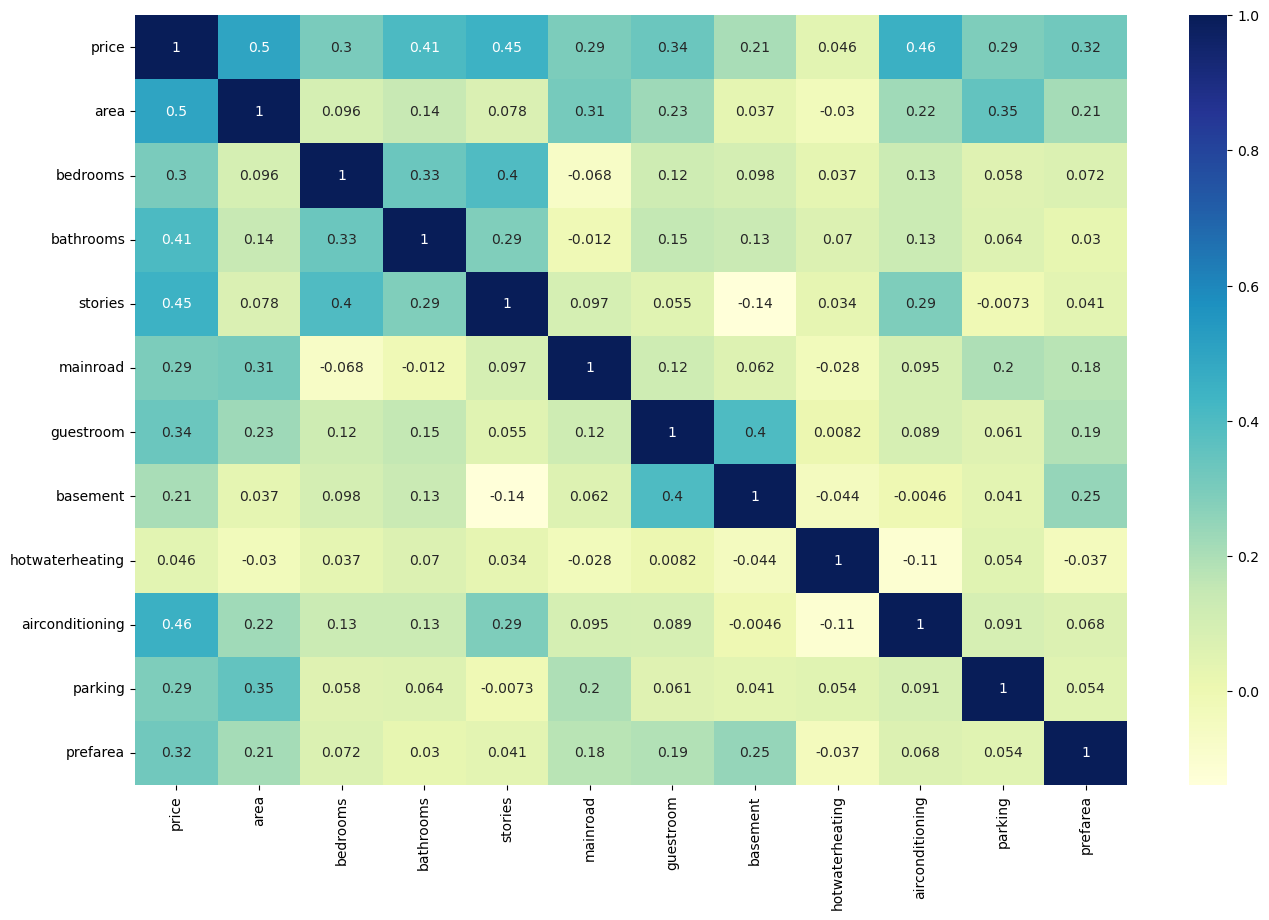

In [132]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()


In [133]:
y_train = df_train.pop('price')
X_train = df_train


In [134]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [135]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [82]:
rfe = RFE(lm, 6)             # running RFE
rfe = rfe.fit(X_train, y_train)

TypeError: RFE.__init__() takes 2 positional arguments but 3 were given

In [83]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

NameError: name 'rfe' is not defined

In [84]:
col = X_train.columns[rfe.support_]
col

NameError: name 'rfe' is not defined

In [85]:
X_train.columns[~rfe.support_]

NameError: name 'rfe' is not defined

In [86]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

NameError: name 'col' is not defined

In [87]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

NameError: name 'X_train_rfe' is not defined

In [88]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

NameError: name 'X_train_rfe' is not defined

In [89]:
print(lm.summary())

AttributeError: 'LinearRegression' object has no attribute 'summary'

In [90]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [91]:
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

NameError: name 'X_train_rfe' is not defined

In [92]:
y_train_price = lm.predict(X_train_rfe)
y_train_price = lm.predict(X_train_rfe)

NameError: name 'X_train_rfe' is not defined

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [94]:
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # ---->Plot heading 
plt.xlabel('Errors', fontsize = 18)                         #-----> X-label

NameError: name 'y_train_price' is not defined

<Figure size 640x480 with 0 Axes>

In [95]:
plt.scatter(y_train,res)
plt.show()

NameError: name 'res' is not defined

In [96]:
## finally evaluating

In [97]:
num_vars = ['area','stories', 'bathrooms', 'airconditioning', 'prefarea','parking','price']

In [98]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

In [99]:
y_test = df_test.pop('price')
X_test = df_test

In [100]:
X_test = sm.add_constant(X_test)

In [101]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_rfe = X_test[X_train_rfe.columns]

NameError: name 'X_train_rfe' is not defined

In [102]:
y_pred = lm.predict(X_test_rfe)

NameError: name 'X_test_rfe' is not defined

In [103]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

NameError: name 'y_pred' is not defined

In [104]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label


NameError: name 'y_pred' is not defined

<Figure size 640x480 with 0 Axes>